In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Crime

## There are different priorities of crime,

    1. Emergency, 1
    2. High Priority, 2
    3. Medium Priority, 3
    --> There must be a low priority
    
There are many types of crime. We will generalize the crimes as 

    1. Criminal crime
    2. Non Criminal crime
    
    


In [2]:
crime_df = pd.read_excel("data/Calls_for_Service_2020-2022.xlsx")
crime_df

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type
0,20200101,00:05:46,2,21,UNKNOWN TROUBLE
1,20200101,02:06:01,4,44,ASSAULT IN PROGRESS
2,20200101,00:37:32,5,55,FIRE
3,20200101,01:41:30,5,55,CHECK WELFARE
4,20200101,00:46:26,1,13,DOMESTIC VIOLENCE
...,...,...,...,...,...
410255,20221231,23:32:02,5,55,NOISE COMPLAINT
410256,20221231,22:35:53,2,22,BREAK IN COMMERCIAL
410257,20221231,21:31:15,2,22,DOMESTIC INCIDENT
410258,20221231,23:08:13,2,23,NOISE COMPLAINT


In [3]:
crime_df.dtypes

Call Date                int64
Call Time (HH:MM:SS)    object
District                object
Sector                  object
Call Type               object
dtype: object

In [4]:
crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d')
crime_df

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS
2,2020-01-01,00:37:32,5,55,FIRE
3,2020-01-01,01:41:30,5,55,CHECK WELFARE
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE
...,...,...,...,...,...
410255,2022-12-31,23:32:02,5,55,NOISE COMPLAINT
410256,2022-12-31,22:35:53,2,22,BREAK IN COMMERCIAL
410257,2022-12-31,21:31:15,2,22,DOMESTIC INCIDENT
410258,2022-12-31,23:08:13,2,23,NOISE COMPLAINT


In [5]:
crime_df['year'] = crime_df['Call Date'].dt.year
crime_df['month'] = crime_df['Call Date'].dt.month
crime_df['day'] = crime_df['Call Date'].dt.day
crime_df.sample(10)

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type,year,month,day
35835,2020-04-10,22:54:19,4,45,SUSPICIOUS VEHICLE,2020,4,10
173695,2021-05-12,08:56:25,5,53,THEFT OF VEHICLE,2021,5,12
31420,2020-03-27,10:26:32,2,23,ASSIST CITIZEN,2020,3,27
9195,2020-01-26,00:56:21,2,22,BREAK AND ENTER IN PROGRESS,2020,1,26
64266,2020-06-30,18:03:16,1,15,PROPERTY DAMAGE,2020,6,30
21240,2020-02-27,06:57:53,5,52,ALARM CANCELLED WHILE ON LINE,2020,2,27
137321,2021-01-24,14:25:10,2,22,HARASSMENT,2021,1,24
281846,2022-02-22,11:52:49,1,12,FRAUD INTAKE,2022,2,22
60399,2020-06-21,12:26:18,1,13,WEAPONS CALL,2020,6,21
310235,2022-05-12,18:18:00,3,31,DOMESTIC FAMILY,2022,5,12


In [6]:
crime_df['District'].unique()

array([2, 4, 5, 1, 3, '~'], dtype=object)

In [7]:
unknown_dis_sec = crime_df[ 
                            (crime_df['Sector'] == '~') | 
                            (crime_df['Sector'] == '~')
                            ].copy()
unknown_dis_sec

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type,year,month,day
347,2020-01-02,15:22:13,~,~,CRC WALK IN ACCIDENT CALL,2020,1,2
880,2020-01-03,16:39:18,~,~,CRC WALK IN ACCIDENT CALL,2020,1,3
1511,2020-01-05,12:48:13,~,~,CRC WALK IN ACCIDENT CALL,2020,1,5
1594,2020-01-05,16:19:07,~,~,ASSIST P.O. OR OTHER AGENCY,2020,1,5
2121,2020-01-07,21:02:18,~,~,UNKNOWN TROUBLE,2020,1,7
...,...,...,...,...,...,...,...,...
408837,2022-12-28,10:31:10,~,~,THEFT,2022,12,28
409493,2022-12-30,11:29:42,~,~,ARU FRAUD,2022,12,30
409495,2022-12-30,08:53:50,~,~,BREAK IN RESIDENTIAL,2022,12,30
409509,2022-12-30,10:27:25,~,~,ARU FRAUD,2022,12,30


In [8]:
unknown_dis_sec.shape[0] / crime_df.shape[0] * 100 

# about 1% of the force does not input their district and sector information
    # or this information is lost through some process

0.8414176375956711

In [9]:
crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d').dt.date
crime_df['Call Time (HH:MM:SS)'] = pd.to_datetime(crime_df['Call Time (HH:MM:SS)'], format='%H:%M:%S').dt.time


crime_df

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type,year,month,day
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE,2020,1,1
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS,2020,1,1
2,2020-01-01,00:37:32,5,55,FIRE,2020,1,1
3,2020-01-01,01:41:30,5,55,CHECK WELFARE,2020,1,1
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE,2020,1,1
...,...,...,...,...,...,...,...,...
410255,2022-12-31,23:32:02,5,55,NOISE COMPLAINT,2022,12,31
410256,2022-12-31,22:35:53,2,22,BREAK IN COMMERCIAL,2022,12,31
410257,2022-12-31,21:31:15,2,22,DOMESTIC INCIDENT,2022,12,31
410258,2022-12-31,23:08:13,2,23,NOISE COMPLAINT,2022,12,31


In [10]:
len(crime_df['Call Type'].unique())

140

In [11]:
list(crime_df['Call Type'].unique())

['UNKNOWN TROUBLE',
 'ASSAULT IN PROGRESS',
 'FIRE',
 'CHECK WELFARE',
 'DOMESTIC VIOLENCE',
 'MVC INJURY',
 'SUSPICIOUS VEHICLE',
 'IMPAIRED',
 'INJURED PERSON',
 'SOUND OF GUNSHOTS',
 'THEFT',
 'MVC PROPERTY DAMAGE',
 'UNWANTED PERSON',
 'THEFT OF VEHICLE',
 'DOMESTIC KEEP THE PEACE',
 'ALARM PANIC',
 'DRIVING COMPLAINT',
 'CRC COMMUNICATIONS ACCIDENT CALL',
 'ASSIST AMBULANCE',
 'THREATS',
 'DISTURBANCE',
 'ALARM DEEMED CAUSED BY ENVIRONMENTAL CIRCUMSTANCES',
 'SILENT 911',
 'COMMERCIAL LANDLINE OR PAYPHONE - ALL OK',
 'ALARM CANCELLED WHILE ON LINE',
 'ASSAULT REPORT',
 'ASSIST CITIZEN',
 'SUICIDE ATTEMPT',
 'ASSIST P.O. OR OTHER AGENCY',
 'RECOVERED AUTO',
 'NOISE COMPLAINT',
 'DISPUTE',
 'KEEP THE PEACE',
 'SUSPICIOUS PERSON',
 'THEFT IN PROGRESS',
 'DOMESTIC FAMILY',
 'EMOTIONALLY DISTURBED PERSON',
 'CRC WALK IN ACCIDENT CALL',
 'ALARM HOLD UP',
 'PROPERTY DAMAGE',
 'INFORMATIONAL CALL',
 'WEAPONS CALL',
 'DRUGS',
 'DOMESTIC INCIDENT',
 'LIQUOR OFFENCE',
 'BREAK AND ENTER IN PR

In [12]:
crime_df.groupby(['District','Sector']).count().reset_index()
# there is only one sector in each district
# There is no combination of ~ with districts and sectors

,District,Sector,Call Date,Call Time (HH:MM:SS),Call Type,year,month,day
0,1,11,22705,22705,22704,22705,22705,22705
1,1,12,17917,17917,17917,17917,17917,17917
2,1,13,26984,26984,26982,26984,26984,26984
3,1,14,13239,13239,13239,13239,13239,13239
4,1,15,13072,13072,13071,13072,13072,13072
5,2,21,21775,21775,21774,21775,21775,21775
6,2,22,32737,32737,32736,32737,32737,32737
7,2,23,26550,26550,26550,26550,26550,26550
8,2,24,9769,9769,9769,9769,9769,9769
9,3,31,19735,19735,19735,19735,19735,19735


AttributeError: module 'matplotlib' has no attribute 'xticks'

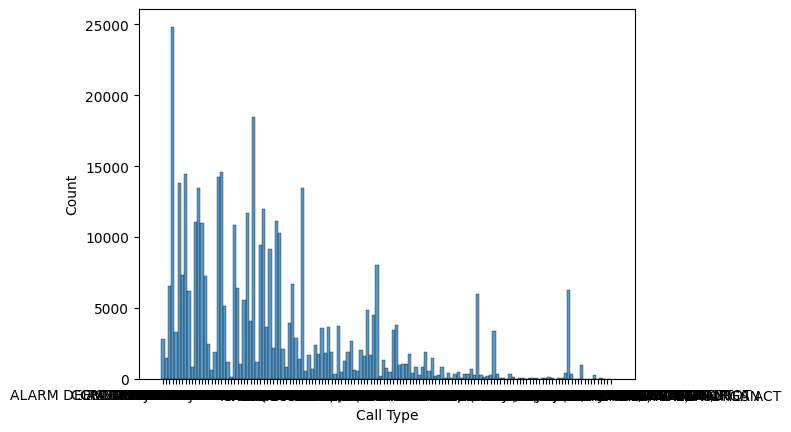

In [15]:
sns.histplot(data=crime_df, x="Call Type")
plt.xticks(rotation=90)